In [1]:
import sys
sys.path.append('/home/hugh/code/TSA_Segmentation/pc2convex')
import os
import numpy as np
import h5py
from glob import glob
from utils import read_data, get_name, ostu3d, get_points, pc2img
from time import time

In [12]:
import scipy

In [13]:
a = scipy.io.loadmat('./matlab.mat')

In [23]:
def mat2npy(fpath):
    tic = time()
    mat = scipy.io.loadmat(fpath)
    pts = np.array(mat['pts'], dtype=np.int)
    intensity = np.array(mat['intensity'])
    out = np.zeros([512, 512, 660])
    for p, i in zip(pts, intensity):
        out[tuple(p)] = i
    print(fname, 'read in in {}s'.format(time() - tic))
    return out

def npy2mat(fpath, pts, intensity):
    tic = time()
    mat = {'pts': pts, 'intensity': intensity}
    scipy.io.savemat(fpath, mat)
    print(fname, 'stored in in {}s'.format(time() - tic))
    
def a3d2mat(fpath, output_dir):
    data = read_data(fpath)
    fname = get_name(fpath)
    
    # save the data as a list of points
    bita, _ = ostu3d(data, min_th=0.1, aug=1.2) # binary data
    
    pts = get_points(bita)
    intensity = []
    for pt in pts:
        intensity.append(data[tuple(pt.astype(np.int))])
    intensity = np.array(intensity).reshape([-1, 1])
    npy2mat(os.path.join(output_dir, fname + '.mat'), pts, intensity)
    

In [20]:
data_dir = glob('/home/hugh/code/TSA_Segmentation/pc2convex/a3d/a3d/*a3d')
output = './output/'
if not os.path.exists(output):
    os.mkdir(output)

for f in data_dir:
    a3d2mat(fpath=f, output_dir=output)
    break

read /home/hugh/code/TSA_Segmentation/pc2convex/a3d/a3d/9657d70069ba334ec5e7dad5aa189aea.a3d costs 40.714823961257935s
9657d70069ba334ec5e7dad5aa189aea stored in in 0.06887578964233398s


In [24]:
a = mat2npy(os.path.join(output, '9657d70069ba334ec5e7dad5aa189aea.mat'))

9657d70069ba334ec5e7dad5aa189aea read in in 3.3133654594421387s


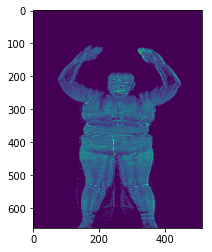

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(pc2img(a, axis=1))

## .npy

In [ ]:
out = np.hstack([pts, intensity])
exit()
h5f = h5py.File(output + fname + '.h5', 'w')
h5f.create_dataset('data', data=data)
h5f.close()
np.savez(output + fname + '.npz')